## Imported Libraries

In [8]:
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as reader
from datetime import datetime

from fbprophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Ticker and its information. From 1990/1/12 - now

In [9]:
ticker = ['INTC']
start = datetime(1990, 1, 12)
end = datetime(2019,8,22)

df = reader.get_data_yahoo(ticker, start, end)
df = df.reset_index()
df

Attributes,Date,Adj Close,Close,High,Low,Open,Volume
Symbols,,INTC,INTC,INTC,INTC,INTC,INTC
0,1990-01-11,0.698895,1.125000,1.148438,1.117188,1.125000,41068800.0
1,1990-01-12,0.684334,1.101562,1.125000,1.093750,1.101562,48851200.0
2,1990-01-15,0.689188,1.109375,1.117188,1.085938,1.101562,33830400.0
3,1990-01-16,0.728015,1.171875,1.179688,1.093750,1.109375,103984000.0
4,1990-01-17,0.730442,1.175781,1.203125,1.171875,1.171875,115017600.0
...,...,...,...,...,...,...,...
7457,2019-08-16,45.451683,46.500000,46.680000,46.060001,46.340000,22701800.0
7458,2019-08-19,46.165222,47.230000,47.599998,47.040001,47.459999,21403600.0
7459,2019-08-20,45.549427,46.599998,47.119999,46.459999,47.029999,23113300.0


## Prophet Model

In [10]:
model = Prophet()
df[['ds','y']] = df[['Date','Adj Close']]
model.fit(df)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


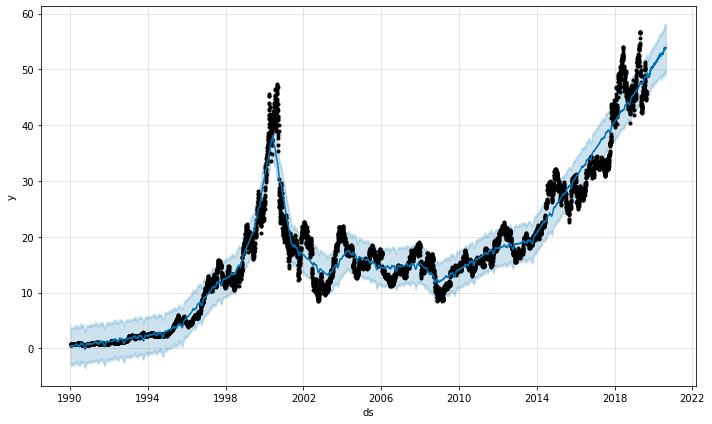

In [11]:
model.plot(forecast)
plt.show()

In [20]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7822,2020-08-17,53.737010,49.082112,58.192129,51.186927,55.847145,0.062224,0.062224,0.062224,-0.056345,-0.056345,-0.056345,0.118570,0.118570,0.118570,0.0,0.0,0.0,53.799235
7823,2020-08-18,53.750648,49.444731,58.062820,51.188809,55.875269,0.083958,0.083958,0.083958,-0.047983,-0.047983,-0.047983,0.131940,0.131940,0.131940,0.0,0.0,0.0,53.834606
7824,2020-08-19,53.764286,49.297510,57.829644,51.190690,55.907224,0.098096,0.098096,0.098096,-0.047800,-0.047800,-0.047800,0.145896,0.145896,0.145896,0.0,0.0,0.0,53.862382
7825,2020-08-20,53.777924,49.150898,58.002828,51.185820,55.949061,0.109479,0.109479,0.109479,-0.050558,-0.050558,-0.050558,0.160037,0.160037,0.160037,0.0,0.0,0.0,53.887403
7826,2020-08-21,53.791562,49.215814,58.038009,51.178894,55.986515,0.101953,0.101953,0.101953,-0.072014,-0.072014,-0.072014,0.173967,0.173967,0.173967,0.0,0.0,0.0,53.893515


## Interactive Plotly Graph

In [21]:
import plotly.graph_objects as go

trace = go.Scatter(
    name = 'Adj Close', mode = 'markers', x=list(df['ds']), y=list(df['y']), marker=dict(color='#FFBAD2', line=dict(width=1)))

trace1= go.Scatter(
    name = 'trend', mode='lines', x=list(forecast['ds']), y=list(forecast['yhat']), marker=dict(color='red', line=dict(width=3)))


In [22]:
upper_band = go.Scatter(
    name = 'upper band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_upper']),
    line= dict(color='#57b88f'),
    fill = 'tonexty'
)

In [23]:
lower_band = go.Scatter(
    name= 'lower band',
    mode = 'lines',
    x = list(forecast['ds']),
    y = list(forecast['yhat_lower']),
    line= dict(color='#1705ff')
)

In [29]:
tracex = go.Scatter(
    name = ' Real Adj Close',
   mode = 'lines',
   x = list(df['ds']),
   y = list(df['y']),
   marker=dict(
      color='black',
      line=dict(width=2)
   )
)

In [30]:
data = [tracex, trace1, lower_band, upper_band]

layout = dict(title='INTC Price Estimation with FBProphet Time Series Analysis',
             xaxis=dict(title = 'Dates', ticklen=2, zeroline=True))

figure=dict(data=data,layout=layout)

In [31]:
py.offline.iplot(figure)